In [1]:
%%capture
import tensorflow as tf
from tensorflow import keras
from scipy.io import loadmat
from tensorflow.keras import regularizers
import os
import time
from IPython.display import HTML, display
! pip install tabulate
from scipy.io import savemat
import tabulate
import numpy as np
import gc
from tensorflow.keras.models import model_from_json
!pip install tqdm
!pip install h5py
import zipfile
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
from tensorflow.keras import backend as K
from sklearn.metrics import r2_score
from sklearn import preprocessing
from tensorflow.keras.models import model_from_json

In [2]:
def scale(x):

    return (x - np.mean(x)) / np.std(x)

In [3]:
def preprocess(x):
    
    return x[:,:,:int(0.75*x.shape[2])]

In [4]:
os.chdir("/home/pk2573")
path = "/home/pk2573/Capstone_Data"

In [5]:
json_file = open('combined_time_model_Tau_12.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model_tau_12 = model_from_json(loaded_model_json)
model_tau_12.load_weights("combined_time_model_Tau_12.h5")
model_tau_12.compile(loss = 'mse', optimizer = tf.train.AdamOptimizer())

In [6]:
json_file = open('combined_time_model_Tau_13.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model_tau_13 = model_from_json(loaded_model_json)
model_tau_13.load_weights("combined_time_model_Tau_13.h5")
model_tau_13.compile(loss = 'mse', optimizer = tf.train.AdamOptimizer())

In [7]:
json_file = open('combined_time_model_Tau_23.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model_tau_23 = model_from_json(loaded_model_json)
model_tau_23.load_weights("combined_time_model_Tau_23.h5")
model_tau_23.compile(loss = 'mse', optimizer = tf.train.AdamOptimizer())

In [8]:
subdirs = [subdir for subdir, dirs, files in os.walk(path)]
try:
    subdirs.remove(path + "/.ipynb_checkpoints")
    subdirs.remove(path + "/Re1243Fr20/.ipynb_checkpoints")
    subdirs.remove(path + "/Re1243Fr20/coarse8/.ipynb_checkpoints")
    subdirs.remove(path + "/Re1243Fr20/coarse16/.ipynb_checkpoints")
    subdirs.remove(path + "/Re1243Fr20/coarse16/.ipynb.mat")
    subdirs.remove(path + "/Re1243Fr20/coarse24/.ipynb.mat")
    subdirs.remove(path + "/Re546/.ipynb_checkpoints")
    subdirs.remove(path + "/Re546/coarse8/.ipynb_checkpoints")
    subdirs.remove(path + "/Re546/coarse16/.ipynb_checkpoints")
    subdirs.remove(path + "/Re546/coarse24/.ipynb_checkpoints")
    subdirs.remove(path + "/Re554Fr5/.ipynb_checkpoints")
    subdirs.remove(path + "/Re554Fr5/coarse16/.ipynb_checkpoints")
    subdirs.remove(path + "/Re554Fr5/coarse24/.ipynb_checkpoints")
    subdirs.remove(path + "/Re309Fr2/.ipynb_checkpoints")
    subdirs.remove(path + "/Re309Fr2/coarse8/.ipynb.mat")
    subdirs.remove(path + "/Re309Fr2/coarse16/.ipynb_checkpoints")
    subdirs.remove(path + "/Re309Fr2/coarse24/.ipynb_checkpoints")
    subdirs.remove(path + "/Re309Fr2/coarse16/.ipynb.mat")
    subdirs.remove(path + "/Re309Fr2/coarse24/.ipynb.mat")
    subdirs.remove(path + "/Re546")
    subdirs.remove(path + "/Re554Fr5")
    subdirs.remove(path + "/Re1243Fr20")
    subdirs.remove(path + "/Re309Fr2")

except:
    pass

subdirs = sorted(subdirs[1:])
subdirs

['/home/pk2573/Capstone_Data/Re1243Fr20/coarse16',
 '/home/pk2573/Capstone_Data/Re1243Fr20/coarse24',
 '/home/pk2573/Capstone_Data/Re1243Fr20/coarse8',
 '/home/pk2573/Capstone_Data/Re309Fr2/coarse16',
 '/home/pk2573/Capstone_Data/Re309Fr2/coarse24',
 '/home/pk2573/Capstone_Data/Re309Fr2/coarse8',
 '/home/pk2573/Capstone_Data/Re546/coarse16',
 '/home/pk2573/Capstone_Data/Re546/coarse24',
 '/home/pk2573/Capstone_Data/Re546/coarse8',
 '/home/pk2573/Capstone_Data/Re554Fr5/coarse16',
 '/home/pk2573/Capstone_Data/Re554Fr5/coarse24',
 '/home/pk2573/Capstone_Data/Re554Fr5/coarse8']


Timestep: 4
Running Re1243Fr20_coarse16
Running Re1243Fr20_coarse24
Running Re1243Fr20_coarse8
Running Re309Fr2_coarse8


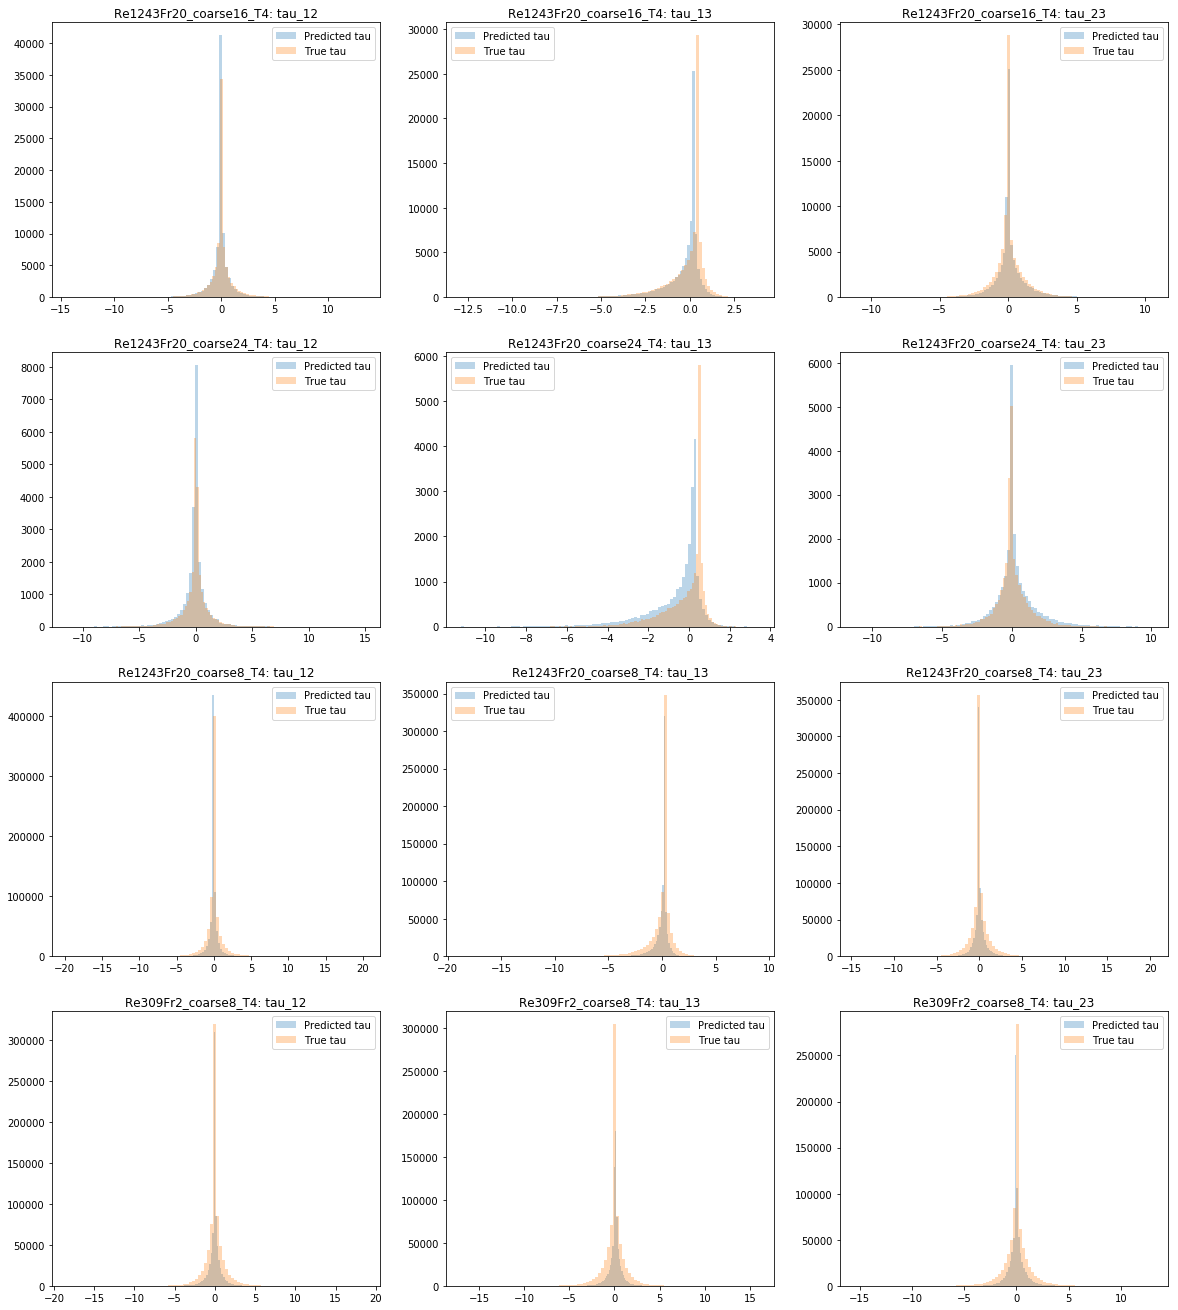

In [9]:
out = [["Data Source", "Tau_12", "Tau_13", "Tau_23"]]
os.mkdir("/home/pk2573/Taus_combined_time")
count = 1
fig = plt.figure(figsize = (20, 96))
for m in [4]:
    print("\nTimestep:", str(m))
    for path in subdirs:
        os.chdir(path)
        
        try:
            u = loadmat('u_F_xyz_T' + str(m) + '.mat')
            u = preprocess(scale(u[list(u.keys())[-1]]))
            v = loadmat('v_F_xyz_T' + str(m) + '.mat')
            v = preprocess(scale(v[list(v.keys())[-1]]))
            w = loadmat('w_F_xyz_T' + str(m) + '.mat')
            w = preprocess(scale(w[list(w.keys())[-1]]))
            tau_12 = loadmat('tau12_F_xyz_T' + str(m) + '.mat')
            tau_12 = preprocess(scale(tau_12[list(tau_12.keys())[-1]]))
            tau_13 = loadmat('tau13_F_xyz_T' + str(m) + '.mat')
            tau_13 = preprocess(scale(tau_13[list(tau_13.keys())[-1]]))
            tau_23 = loadmat('tau23_F_xyz_T' + str(m) + '.mat')
            tau_23 = preprocess(scale(tau_23[list(tau_23.keys())[-1]]))

            print("Running " + path.split("/")[-2] + "_" + path.split("/")[-1])
            
            x = np.array([u, v, w])
            x = np.transpose(x, [1, 2, 3, 0])
            x = np.pad(x, ((3,3), (3,3), (3,3), (0,0)), 'constant', constant_values = 0)

            del u
            del v
            del w
            gc.collect()

            sample = []
            size = 3
            y_tau_12 = []
            y_tau_13 = []
            y_tau_23 = []
            for i in range(size, x.shape[0] - size):
                for j in range(size, x.shape[1] - size):
                    for k in range(size, x.shape[2] - size):
                        sample.append(x[i - size: i + size + 1, j - size: j + size + 1, k - size: k + size + 1, :])
                        y_tau_12.append(tau_12[i - size][j - size][k - size])
                        y_tau_13.append(tau_13[i - size][j - size][k - size])
                        y_tau_23.append(tau_23[i - size][j - size][k - size])

            x = np.array(sample)

            tau_12 = np.array(y_tau_12)
            tau_13 = np.array(y_tau_13)
            tau_23 = np.array(y_tau_23)

            del sample
            gc.collect()

            output = [(tau_12, "tau_12", model_tau_12), (tau_13, "tau_13", model_tau_13), (tau_23, "tau_23", model_tau_23)]

            corrs = []
            for (y_true, name, model) in output:
                y_pred = model.predict(x).flatten()
                corrs.append(np.corrcoef(y_pred, y_true)[0, 1])

                #if count <= 18:
                fig.add_subplot(len(subdirs) + 4, 3, count)
                n_bins = 100
                plt.hist(y_pred, bins = n_bins, alpha = 0.3, label = "Predicted tau")
                plt.hist(y_true, bins = n_bins, alpha = 0.3, label = "True tau")
                plt.title(path.split("/")[-2] + "_" + path.split("/")[-1] + str("_T" + str(m)) + ": " + name)
                plt.legend()
                plt.show
                
                os.chdir("/home/pk2573/Taus")
                savemat(str(path.split("/")[-2] + "_" + path.split("/")[-1] + "_T" + str(m) + "_" + name), {'tau':y_pred})

                count += 1

            out.append([path.split("/")[-2] + "_" + path.split("/")[-1] + "_T" + str(m), str(np.round(corrs[0], 4)), str(np.round(corrs[1], 4)), str(np.round(corrs[2], 4))])

            del x
            del tau_12
            del tau_13
            del tau_23
            del model
            del y_pred4
            del y_true
            gc.collect()
            
        except:
            pass
        
    out.append(["", "", "", ""])

In [10]:
display(HTML(tabulate.tabulate(out, tablefmt = 'html')))

Data Source,Tau_12,Tau_13,Tau_23
Re1243Fr20_coarse16_T4,0.7764,0.8489,0.8213
Re1243Fr20_coarse24_T4,0.7185,0.8077,0.774
Re1243Fr20_coarse8_T4,0.84,0.8807,0.8741
Re309Fr2_coarse8_T4,0.8255,0.8722,0.8743
,,,
